In [ ]:
import numpy as np

def softmax(z):
    """
    Compute the softmax probabilities for a given input matrix.

    Parameters:
    z (numpy.ndarray): Logits (raw scores) of shape (m, n), where
        - m is the number of samples.
        - n is the number of classes.

    Returns:
    numpy.ndarray: Softmax probability matrix of shape (m, n), where
    each row sums to 1 and represents the probability
    distribution over classes.



    Notes:
    - The input to softmax is typically computed as: z = XW + b.
    - Uses numerical stabilization by subtracting the max value per row.


    """
    z_max = np.max(z, axis=1, keepdims=True)  # Find max for numerical stability
    exp_z = np.exp(z - z_max)  # Subtract max from each row before exponentiation
    softmax_probs = exp_z / np.sum(exp_z, axis=1, keepdims=True)  # Normalize

    return softmax_probs


In [ ]:
import numpy as np

def predict_softmax(X, W, b):
    """
    Predict the class labels for a set of samples using the trained softmax model.

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d), where n is the number of samples and d is the number of features.
    W (numpy.ndarray): Weight matrix of shape (d, c), where c is the number of classes.
    b (numpy.ndarray): Bias vector of shape (c,).

    Returns:
    numpy.ndarray: Predicted class labels of shape (n,), where each value is the index of the predicted class.
    """
    logits = np.dot(X, W) + b  # Compute raw scores (logits)
    probabilities = np.exp(logits - np.max(logits, axis=1, keepdims=True))  # Apply numerical stability
    probabilities /= np.sum(probabilities, axis=1, keepdims=True)  # Normalize to get softmax probabilities
    predicted_classes = np.argmax(probabilities, axis=1)  # Get the index of the max probability (class prediction)

    return predicted_classes


In [ ]:
# The test function ensures that the predicted class labels have the same number of elements as theinput samples, verifying that the model produces a valid output shape.
# Define test case
X_test = np.array([[0.2, 0.8], [0.5, 0.5], [0.9, 0.1]]) # Feature matrix (3 samples, 2 features)
W_test = np.array([[0.4, 0.2, 0.1], [0.3, 0.7, 0.5]]) # Weights (2 features, 3 classes)
b_test = np.array([0.1, 0.2, 0.3]) # Bias (3 classes)
# Expected Output:
# The function should return an array with class labels (0, 1, or 2)
y_pred_test = predict_softmax(X_test, W_test, b_test)
# Validate output shape
assert y_pred_test.shape == (3,), f"Test failed: Expected shape (3,), got {y_pred_test.shape}"
# Print the predicted labels
print("Predicted class labels:", y_pred_test)

Predicted class labels: [1 1 0]


In [ ]:
import numpy as np

def loss_softmax(y_pred, y):
    """
    Compute the cross-entropy loss for a single sample.

    Parameters:
    y_pred (numpy.ndarray): Predicted probabilities of shape (c,) for a single sample,
                            where c is the number of classes.
    y (numpy.ndarray): True labels (one-hot encoded) of shape (c,), where c is the number of classes.

    Returns:
    float: Cross-entropy loss for the given sample.
    """
    epsilon = 1e-15  # Small value to prevent log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Clip to avoid log(0)
    loss = -np.sum(y * np.log(y_pred))  # Compute cross-entropy loss

    return loss


In [ ]:
import numpy as np
# This test case Compares loss for correct vs. incorrect predictions.
# Expects low loss for correct predictions.
# Expects high loss for incorrect predictions.
# Define correct predictions (low loss scenario)
y_true_correct = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]]) # True one-hot labels
y_pred_correct = np.array([[0.9, 0.05, 0.05],
[0.1, 0.85, 0.05],
[0.05, 0.1, 0.85]]) # High confidence in the correct class

# Define incorrect predictions (high loss scenario)
y_pred_incorrect = np.array([[0.05, 0.05, 0.9], # Highly confident in the wrong class

[0.1, 0.05, 0.85],
[0.85, 0.1, 0.05]])

# Compute loss for both cases
loss_correct = loss_softmax(y_pred_correct, y_true_correct)
loss_incorrect = loss_softmax(y_pred_incorrect, y_true_correct)
# Validate that incorrect predictions lead to a higher lossassert
loss_correct < loss_incorrect, f"Test failed: Expected loss_correct < loss_incorrect, but got {loss_correct:.4f} >= {loss_incorrect:.4f}"
# Print results
print(f"Cross-Entropy Loss (Correct Predictions): {loss_correct:.4f}")
print(f"Cross-Entropy Loss (Incorrect Predictions): {loss_incorrect:.4f}")

Cross-Entropy Loss (Correct Predictions): 0.4304
Cross-Entropy Loss (Incorrect Predictions): 8.9872


In [ ]:
import numpy as np

def cost_softmax(X, y, W, b):
    """
    Compute the average softmax regression cost (cross-entropy loss) over all samples.

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d), where n is the number of samples and d is the number of features.
    y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c), where n is the number of samples and c is the number of classes.
    W (numpy.ndarray): Weight matrix of shape (d, c).
    b (numpy.ndarray): Bias vector of shape (c,).

    Returns:
    float: Average softmax cost (cross-entropy loss) over all samples.
    """
    n = X.shape[0]  # Number of samples

    # Compute logits
    logits = np.dot(X, W) + b  # Shape (n, c)

    # Compute softmax probabilities with numerical stability
    logits_max = np.max(logits, axis=1, keepdims=True)  # Max value per sample
    exp_logits = np.exp(logits - logits_max)  # Exponentiate after subtracting max
    softmax_probs = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)  # Normalize

    # Compute cross-entropy loss
    epsilon = 1e-15  # Avoid log(0)
    softmax_probs = np.clip(softmax_probs, epsilon, 1 - epsilon)  # Clip for stability
    total_loss = -np.sum(y * np.log(softmax_probs))  # Sum of cross-entropy losses

    # Return average loss
    return total_loss / n


In [ ]:
# The test case assures that the cost for the incorrect prediction should be higher than for the correct prediction, confirming that the cost function behaves as expected.
import numpy as np
# Example 1: Correct Prediction (Closer predictions)
X_correct = np.array([[1.0, 0.0], [0.0, 1.0]]) # Feature matrix for correct predictions
y_correct = np.array([[1, 0], [0, 1]]) # True labels (one-hot encoded, matching predictions)
W_correct = np.array([[5.0, -2.0], [-3.0, 5.0]]) # Weights for correct prediction
b_correct = np.array([0.1, 0.1]) # Bias for correct prediction
# Example 2: Incorrect Prediction (Far off predictions)
X_incorrect = np.array([[0.1, 0.9], [0.8, 0.2]]) # Feature matrix for incorrect predictions
y_incorrect = np.array([[1, 0], [0, 1]]) # True labels (one-hot encoded, incorrect predictions)
W_incorrect = np.array([[0.1, 2.0], [1.5, 0.3]]) # Weights for incorrect prediction
b_incorrect = np.array([0.5, 0.6]) # Bias for incorrect prediction
# Compute cost for correct predictions
cost_correct = cost_softmax(X_correct, y_correct, W_correct, b_correct)
# Compute cost for incorrect predictions
cost_incorrect = cost_softmax(X_incorrect, y_incorrect, W_incorrect, b_incorrect)
# Check if the cost for incorrect predictions is greater than for correct predictions assert
cost_incorrect > cost_correct, f"Test failed: Incorrect cost {cost_incorrect} is not greater than correct cost {cost_correct}"
# Print the costs for verification
print("Cost for correct prediction:", cost_correct)
print("Cost for incorrect prediction:", cost_incorrect)
print("Test passed!")

Cost for correct prediction: 0.0006234364133349324
Cost for incorrect prediction: 0.29930861359446115
Test passed!


# **Task**

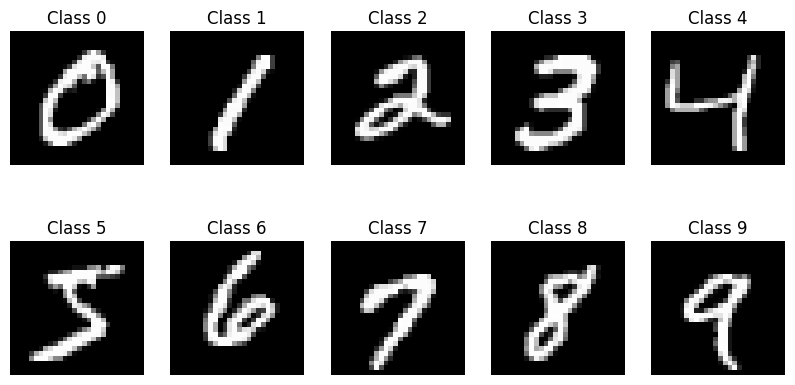

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


def load_and_prepare_mnist(csv_file, test_size=0.2, random_state=42):
    """
    Reads the MNIST CSV file, splits data into train/test sets, and plots one image per class.

    Arguments:
    csv_file (str): Path to the CSV file containing MNIST data.
    test_size (float): Proportion of the data to use as the test set (default: 0.2).
    random_state (int): Random seed for reproducibility (default: 42).

    Returns:
    X_train, X_test, y_train, y_test: Split dataset.
    """
    # Load dataset
    df = pd.read_csv('/content/drive/MyDrive/mnist_dataset.csv')

    # Separate labels and features
    y = df.iloc[:, 0].values  # First column is the label
    X = df.iloc[:, 1:].values  # Remaining columns are pixel values

    # Normalize pixel values (recommended for neural networks)
    X = X / 255.0  # Scale values between 0 and 1

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Plot one sample image per class
    plot_sample_images(X, y)

    return X_train, X_test, y_train, y_test

# Example usage:
X_train, X_test, y_train, y_test = load_and_prepare_mnist("mnist_dataset.csv")



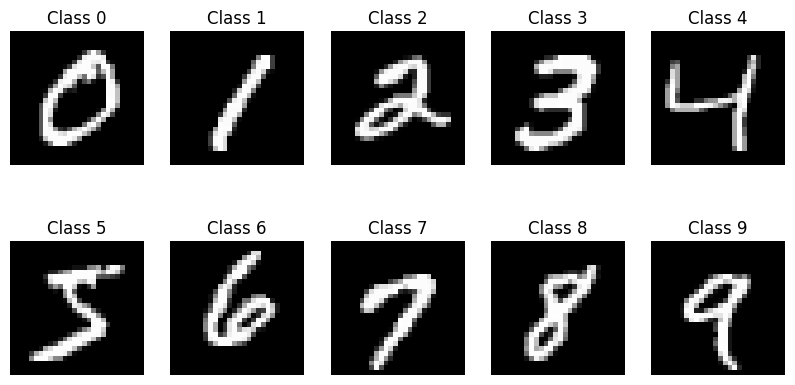

In [ ]:


def plot_sample_images(X, y, num_classes=10):
    """
    Plots one sample image per class from the dataset.

    Parameters:
    X (numpy.ndarray): Feature matrix containing pixel values.
    y (numpy.ndarray): Labels corresponding to the images.
    num_classes (int): Number of unique classes to display.
    """
    plt.figure(figsize=(10, 5))
    unique_classes = np.unique(y)

    for i, label in enumerate(unique_classes[:num_classes]):
        index = np.where(y == label)[0][0]  # Get index of the first image for each class
        image = X[index].reshape(28, 28)  # Reshape to 28x28 for visualization
        plt.subplot(2, 5, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"Class {label}")
        plt.axis('off')

    plt.show()
plot_sample_images(X, y, num_classes=10)

Training of the Model:

In [ ]:
import numpy as np

def compute_gradient_softmax(X, y, W, b):
    """
    Compute the gradients of the cost function with respect to weights and biases.

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d), where n is the number of samples and d is the number of features.
    y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c), where c is the number of classes.
    W (numpy.ndarray): Weight matrix of shape (d, c).
    b (numpy.ndarray): Bias vector of shape (c,).

    Returns:
    tuple: Gradients with respect to weights (d, c) and biases (c,).
    """
    n = X.shape[0]  # Number of samples

    # Compute logits (raw scores)
    logits = np.dot(X, W) + b  # Shape (n, c)

    # Compute softmax probabilities with numerical stability
    logits_max = np.max(logits, axis=1, keepdims=True)  # Shape (n, 1), max per row
    exp_logits = np.exp(logits - logits_max)  # Apply exponentiation after stabilization
    softmax_probs = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)  # Normalize

    # Compute gradients
    dZ = softmax_probs - y  # Gradient of softmax + cross-entropy loss (n, c)
    grad_W = np.dot(X.T, dZ) / n  # Shape (d, c), weight gradient
    grad_b = np.sum(dZ, axis=0) / n  # Shape (c,), bias gradient

    return grad_W, grad_b


In [ ]:
import numpy as np
# Define a simple feature matrix and true labels
X_test = np.array([[0.2, 0.8], [0.5, 0.5], [0.9, 0.1]]) # Feature matrix (3 samples, 2 features)
y_test = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]]) # True labels (one-hot encoded, 3 classes)
# Define weight matrix and bias vector
W_test = np.array([[0.4, 0.2, 0.1], [0.3, 0.7, 0.5]]) # Weights (2 features, 3 classes)
b_test = np.array([0.1, 0.2, 0.3]) # Bias (3 classes)
# Compute the gradients using the function
grad_W, grad_b = compute_gradient_softmax(X_test, y_test, W_test, b_test)
# Manually compute the predicted probabilities (using softmax function)
z_test = np.dot(X_test, W_test) + b_test
y_pred_test = softmax(z_test)
# Compute the manually computed gradients
grad_W_manual = np.dot(X_test.T, (y_pred_test - y_test)) / X_test.shape[0]
grad_b_manual = np.sum(y_pred_test - y_test, axis=0) / X_test.shape[0]
# Assert that the gradients computed by the function match the manually computed gradients
assert np.allclose(grad_W, grad_W_manual), f"Test failed: Gradients w.r.t. W are not equal.\
nExpected: {grad_W_manual}\nGot: {grad_W}"
assert np.allclose(grad_b, grad_b_manual), f"Test failed: Gradients w.r.t. b are not equal.\
nExpected: {grad_b_manual}\nGot: {grad_b}"
# Print the gradients for verification
print("Gradient w.r.t. W:", grad_W)
print("Gradient w.r.t. b:", grad_b)
print("Test passed!")

Gradient w.r.t. W: [[ 0.1031051   0.01805685 -0.12116196]
 [-0.13600547  0.00679023  0.12921524]]
Gradient w.r.t. b: [-0.03290036  0.02484708  0.00805328]
Test passed!


In [ ]:
import numpy as np

def gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=False):
    """
    Perform gradient descent to optimize the weights and biases.

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d), where n is the number of samples and d is the number of features.
    y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c), where c is the number of classes.
    W (numpy.ndarray): Weight matrix of shape (d, c).
    b (numpy.ndarray): Bias vector of shape (c,).
    alpha (float): Learning rate.
    n_iter (int): Number of iterations.
    show_cost (bool): Whether to display the cost at intervals.

    Returns:
    tuple: Optimized weights, biases, and cost history.
    """
    cost_history = []

    for i in range(n_iter):
        # Compute gradients
        grad_W, grad_b = compute_gradient_softmax(X, y, W, b)

        # Update parameters using gradient descent
        W -= alpha * grad_W  # Update weights
        b -= alpha * grad_b  # Update bias

        # Compute and store cost for analysis
        cost = cost_softmax(X, y, W, b)
        cost_history.append(cost)

        # Display cost at every 100 iterations
        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i+1}/{n_iter}, Cost: {cost:.4f}")

    return W, b, cost_history


In [ ]:
# Assert that X and y have matching lengths assert
len(X_train) == len(y_train),f"Error: X and y have different lengths! X={len(X_train)}, y={len(y_train)}"
print("Move forward: Dimension of Feture Matrix X and label vector y matched.")

Move forward: Dimension of Feture Matrix X and label vector y matched.


Training of the Softmax Regression Model.

Iteration 1/1000, Cost: 2.1812
Iteration 101/1000, Cost: 0.6066
Iteration 201/1000, Cost: 0.4893
Iteration 301/1000, Cost: 0.4408
Iteration 401/1000, Cost: 0.4127
Iteration 501/1000, Cost: 0.3939
Iteration 601/1000, Cost: 0.3800
Iteration 701/1000, Cost: 0.3693
Iteration 801/1000, Cost: 0.3607
Iteration 901/1000, Cost: 0.3536
Iteration 1000/1000, Cost: 0.3476


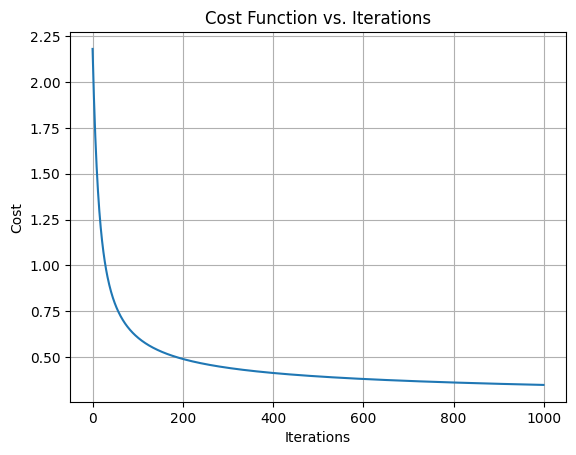

Final Weights:
 [[-0.01888449  0.01986468 -0.00586784 ...  0.00551725 -0.00658723
   0.0042585 ]
 [ 0.006281   -0.00024554  0.00380913 ...  0.00048876 -0.01193168
   0.00125597]
 [-0.01084671  0.01112847  0.00113556 ... -0.00992615 -0.00356178
  -0.00317479]
 ...
 [ 0.01114422 -0.01420553  0.01192516 ...  0.01173034 -0.00093909
  -0.02079058]
 [ 0.01086057  0.01129618  0.00503432 ...  0.00112832  0.00771127
   0.000633  ]
 [ 0.00115582 -0.00743096 -0.01530983 ... -0.01340209 -0.00501066
  -0.00507559]]
Final Bias:
 [-0.13285125  0.23989306 -0.02126119 -0.12059288  0.07652984  0.4278096
 -0.02543168  0.22664369 -0.58272603 -0.08801316]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-Hot Encoding of labels
if len(y_train.shape) == 1:  # Check if labels are not already one-hot encoded
    encoder = OneHotEncoder(sparse_output=False)
    y_train = encoder.fit_transform(y_train.reshape(-1, 1))  # Train labels
    y_test = encoder.transform(y_test.reshape(-1, 1))  # Test labels

# Define the number of features and classes
d = X_train.shape[1]  # Number of features
c = y_train.shape[1]  # Number of classes

# Initialize weights and bias
W = np.random.randn(d, c) * 0.01  # Small random weights
b = np.zeros(c)  # Initialize biases to zero

# Set hyperparameters for gradient descent
alpha = 0.1  # Learning rate
n_iter = 1000  # Number of iterations

# Train the model using gradient descent
W_opt, b_opt, cost_history = gradient_descent_softmax(X_train, y_train, W, b, alpha, n_iter, show_cost=True)

# Plot cost function vs. iterations
plt.plot(cost_history)
plt.title("Cost Function vs. Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid(True)
plt.show()

# Final weights and bias after training
print("Final Weights:\n", W_opt)
print("Final Bias:\n", b_opt)


Evaluating Your Model Performance:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

def evaluate_classification(y_true, y_pred):
    """
    Evaluate classification performance using confusion matrix, precision, recall, and F1-score.

    Parameters:
    y_true (numpy.ndarray): True labels.
    y_pred (numpy.ndarray): Predicted labels.

    Returns:
    tuple: Confusion matrix, precision, recall, F1 score.
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Compute precision, recall, and F1-score (using 'weighted' averaging for multi-class)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    return cm, precision, recall, f1



Confusion Matrix:
[[1128    0    5    2    3   10    9    2   13    3]
 [   0 1274    7   11    1    5    1    4   18    1]
 [   1   16 1026   16   19    4   27   24   33    8]
 [   8    5   34 1047    1   55    9    8   31   21]
 [   1    5    7    1 1094    0   10    4    4   50]
 [  22   14   13   43   12  921   14    7   44   14]
 [   7    2   10    1   11   16 1118    2   10    0]
 [   7   27   24    5   16    2    0 1181    7   30]
 [   9   27   13   33    9   32   13    6 1003   15]
 [   8    6   10   18   43    9    0   38   10 1052]]
Precision: 0.90
Recall: 0.90
F1-Score: 0.90


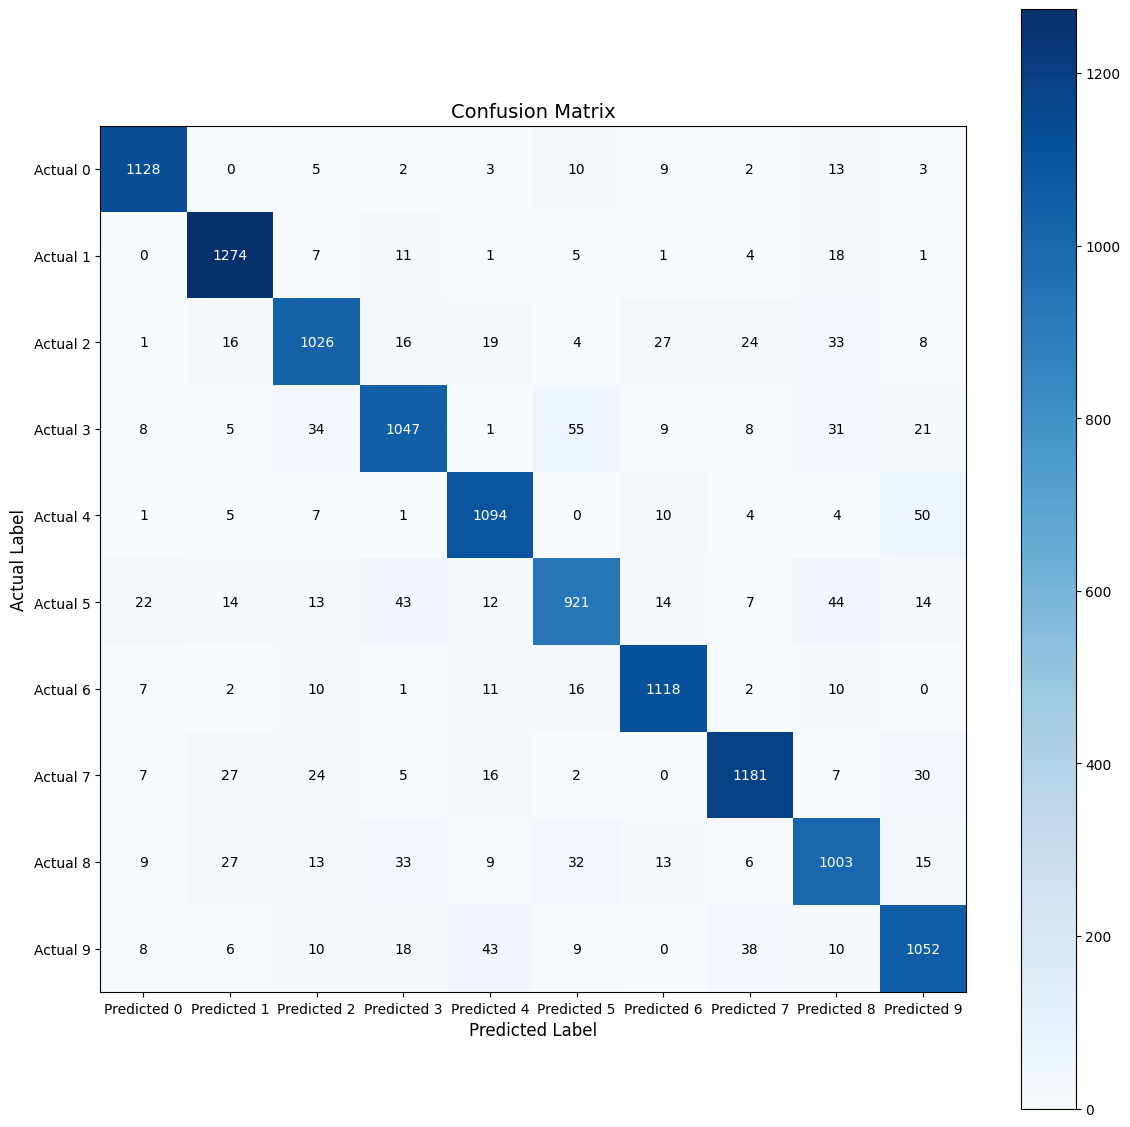

In [ ]:
# Predict on the test set using the trained model
y_pred_test = predict_softmax(X_test, W_opt, b_opt)

# Evaluate accuracy: Convert one-hot encoded true labels to class labels (numeric form)
y_test_labels = np.argmax(y_test, axis=1)  # True labels in numeric form

# Evaluate the model
cm, precision, recall, f1 = evaluate_classification(y_test_labels, y_pred_test)

# Print the evaluation metrics
print("\nConfusion Matrix:")
print(cm)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Visualizing the Confusion Matrix
fig, ax = plt.subplots(figsize=(12, 12))
cax = ax.imshow(cm, cmap='Blues')  # Corrected the color map name

# Dynamic number of classes
num_classes = cm.shape[0]
ax.set_xticks(range(num_classes))
ax.set_yticks(range(num_classes))
ax.set_xticklabels([f"Predicted {i}" for i in range(num_classes)])
ax.set_yticklabels([f"Actual {i}" for i in range(num_classes)])

# Add labels to each cell in the confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha="center", va="center",
                color="white" if cm[i, j] > np.max(cm) / 2 else "black")

# Add grid lines and axis labels
ax.grid(False)
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('Actual Label', fontsize=12)

# Adjust layout and color bar
plt.tight_layout()
plt.colorbar(cax)
plt.show()


Exercise - Linear Separability and Logistic Regression.

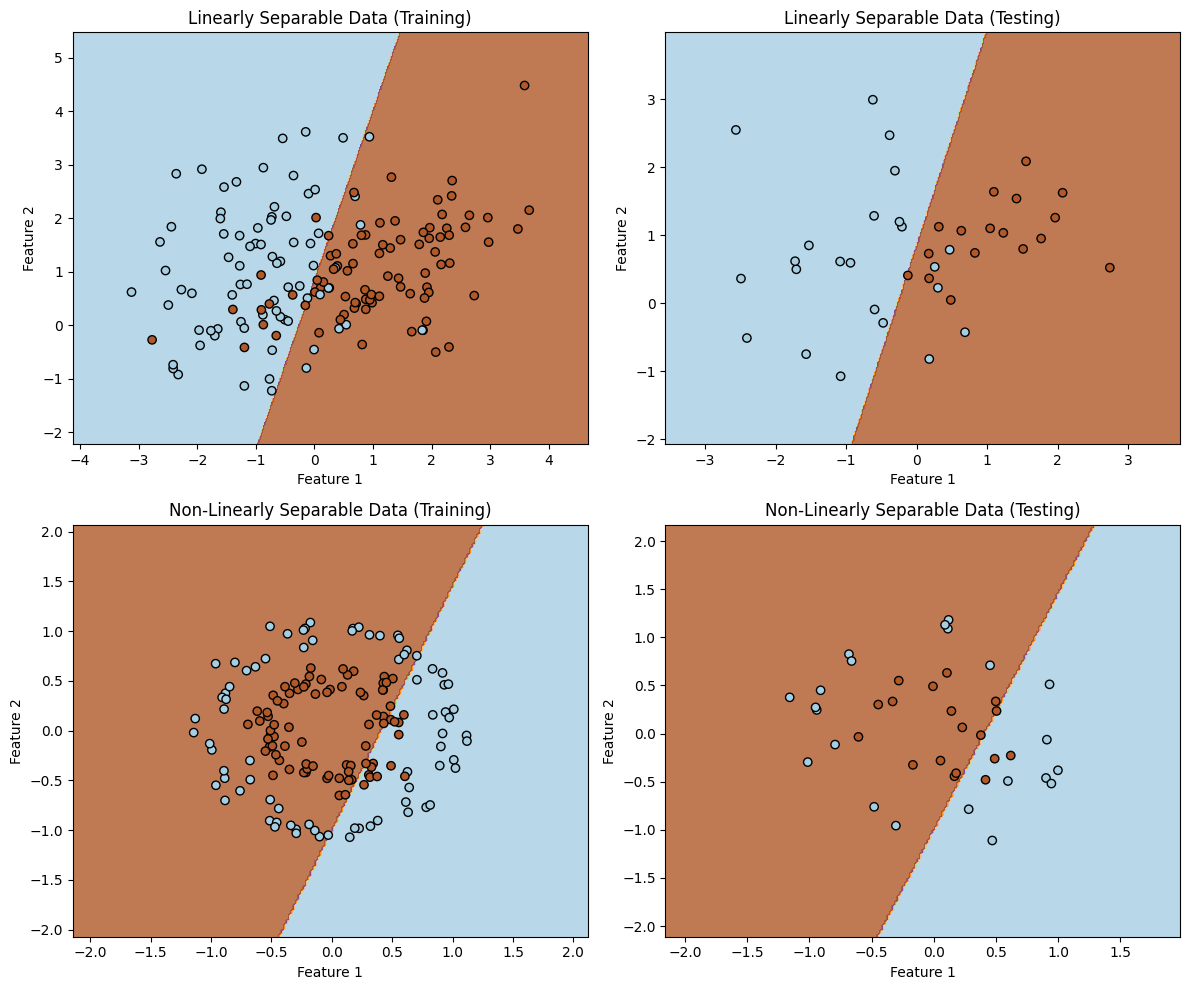

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_circles
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Set random seed for reproducibility
np.random.seed(42)

# Generate linearly separable dataset
X_linear_separable, y_linear_separable = make_classification(n_samples=200, n_features=2,
                                                              n_informative=2, n_redundant=0, n_clusters_per_class=1,
                                                              random_state=42)

# Split the data into training and testing sets
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(
    X_linear_separable, y_linear_separable, test_size=0.2, random_state=42
)

# Train logistic regression model on linearly separable data
logistic_model_linear_separable = LogisticRegression()
logistic_model_linear_separable.fit(X_train_linear, y_train_linear)

# Generate non-linearly separable dataset (circles)
X_non_linear_separable, y_non_linear_separable = make_circles(n_samples=200, noise=0.1, factor=0.5,
                                                              random_state=42)

# Split the data into training and testing sets
X_train_non_linear, X_test_non_linear, y_train_non_linear, y_test_non_linear = train_test_split(
    X_non_linear_separable, y_non_linear_separable, test_size=0.2, random_state=42
)

# Train logistic regression model on non-linearly separable data
logistic_model_non_linear_separable = LogisticRegression()
logistic_model_non_linear_separable.fit(X_train_non_linear, y_train_non_linear)

# Plot decision boundaries for linearly and non-linearly separable data
def plot_decision_boundary(ax, model, X, y, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot decision boundary for linearly separable data (Training)
plot_decision_boundary(axes[0, 0], logistic_model_linear_separable, X_train_linear, y_train_linear,
                       'Linearly Separable Data (Training)')

# Plot decision boundary for linearly separable data (Testing)
plot_decision_boundary(axes[0, 1], logistic_model_linear_separable, X_test_linear, y_test_linear,
                       'Linearly Separable Data (Testing)')

# Plot decision boundary for non-linearly separable data (Training)
plot_decision_boundary(axes[1, 0], logistic_model_non_linear_separable, X_train_non_linear,
                       y_train_non_linear, 'Non-Linearly Separable Data (Training)')

# Plot decision boundary for non-linearly separable data (Testing)
plot_decision_boundary(axes[1, 1], logistic_model_non_linear_separable, X_test_non_linear,
                       y_test_non_linear, 'Non-Linearly Separable Data (Testing)')

plt.tight_layout()

# Save the plots as PNG files
plt.savefig('decision_boundaries.png')
plt.show()
